<div style="font-family: 'Poppins'; font-weight: bold; letter-spacing: 0px; color: #FFFFFF; font-size: 300%; text-align: center; padding: 15px; background: #0A0F29; border: 8px solid #00FFFF; border-radius: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5);">
    Spaceship Titanic - EDA - Scikit-learn
</div>


<img src="https://imgur.com/D6A6wza.jpg" width="1200px">

Photo by [Alek Kalinowski](https://unsplash.com/fr/@alekversusworld) on Unsplash

# <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Introduction</div> 

## <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Challenge Overview</div>

This challenge is a variation on the famous Titanic dataset. I am using it as support to create a simple scikit-learn pipeline for classification.
The dataset simulates a situation where a space anomaly may have transported passengers to an alternate dimension. The aim is to build a model to determine the likelihood of a passenger being transported based on various features.

## <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Dataset Description</div>

The dataset for this challenge is split into two main parts:

* train.csv: This file contains personal records for approximately two-thirds of the passengers (about 8700 records). It includes both the features and the target variable Transported, which we need to predict. Features include categorical and numerical data such as PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP status, and expenditures on various onboard services.
* test.csv: This file contains records for the remaining one-third of the passengers (around 4300 records). It includes the same features as the training set but lacks the target variable; our model's predictions for this set will be evaluated.

## <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Evaluation Metric</div>

The primary metric for evaluating submissions is classification accuracy, which measures the proportion of correctly predicted labels (whether a passenger was transported or not) against the total number of cases.

## <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Approach using Scikit-Learn</div> 

## Preprocessing Pipeline Overview
The preprocessing pipeline is divided into two main parts to handle different data types: one for categorical data and the other for numerical data. These are then combined into a single pipeline using Scikit-learn's ColumnTransformer.

### Categorical Data Preprocessing

* SimpleImputer (Most Frequent Strategy): This step fills missing values in categorical columns with the most frequent value in each column. It's a common approach to handle missing data in categorical features.
* OneHotEncoder: This step converts categorical variables into a form that could be provided to machine learning algorithms to do a better job in prediction. It creates binary (0 or 1) columns for each category of the original categorical variables. The handle_unknown='ignore' option ensures that the encoder ignores any unseen categories in the test data.

### Numerical Data Preprocessing
* SimpleImputer (Median Strategy): For numerical data, missing values are filled with the median value of each column. The median is less sensitive to outliers than the mean and is a common choice for imputation in numerical data.
* StandardScaler: This step standardizes the features by removing the mean and scaling to unit variance. Standardization is a common requirement for many machine learning estimators in Scikit-learn, as they might behave badly if the individual features do not resemble standard normally distributed data.

### Combining the Pipelines
* ColumnTransformer: This Scikit-learn tool combines the two pipelines. It applies the appropriate preprocessing steps to each column type (numerical or categorical). The transformers are defined as follows:
'num' for the numerical pipeline, applied to numerical_cols.
'cat' for the categorical pipeline, applied to categorical_cols.

## Explore Best Models

* The training dataset is split into train, validation, and test sets.
* Preprocessing pipelines for categorical and numerical data are created.
* A range of models including RandomForest, LogisticRegression, SVC, SGDClassifier, RidgeClassifier, XGBoost, and LightGBM are trained and evaluated using cross-validation.
* The models' performances are compared using F1 scores.

## Train Model

* Top performing models (LightGBM, XGBoost, SVC) are identified for ensemble.
* These models are fine-tuned using GridSearchCV.
* A VotingClassifier is used to create an ensemble model, combining the fine-tuned models.
* The ensemble model is trained and evaluated on the split datasets, with performance metrics like Precision, Recall, and F1-Score reported.

## Prepare Final Submission

* The final model is trained on the full training dataset.
* Predictions are made on the test dataset.
* A submission file is prepared and saved, ready for submission.

# <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Simple EDA</div>

In [1]:
!pip install sweetviz > /dev/null 2>&1

In [2]:
# Import libraries
import numpy as np
import sweetviz as sv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                              AdaBoostClassifier, VotingClassifier)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.model_selection import (train_test_split, StratifiedKFold, 
                                     cross_val_score, RandomizedSearchCV)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

In [3]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
sample_submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

In [4]:
# Basic Exploration
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
sample_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [7]:
train_data.shape

(8693, 14)

In [8]:
test_data.shape

(4277, 13)

In [9]:
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [10]:
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [11]:
# Automated EDA report with sweetviz

# Comparing the train and test datasets
report = sv.compare([train_data, "Train"], [test_data, "Test"])
report.show_html(filepath='/kaggle/working/Comparative_EDA_Report.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report /kaggle/working/Comparative_EDA_Report.html was generated.


# <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Explore best models</div> 

In [12]:
# Splitting dataset into train and test
X = train_data.drop('Transported', axis=1)
y = train_data['Transported']

# Splitting the original dataset into training and a temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Splitting the temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [13]:
# Identifying categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

In [14]:
# Creating a preprocessing pipeline
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_cols),
        ('cat', categorical_preprocessor, categorical_cols)
    ])

RandomForest: 0.7747543192229541 ± 0.005046186128520279
LogisticRegression: 0.79082915258921 ± 0.006366533801778407
SVC: 0.788947992788848 ± 0.0062248515062467424
SGDClassifier: 0.7866142858590279 ± 0.008084288405702236
RidgeClassifier: 0.7555429670097213 ± 0.01030178535688885
XGBoost: 0.7905762354140837 ± 0.008508771294248868
LightGBM: 0.7966016515827464 ± 0.007709180292657317


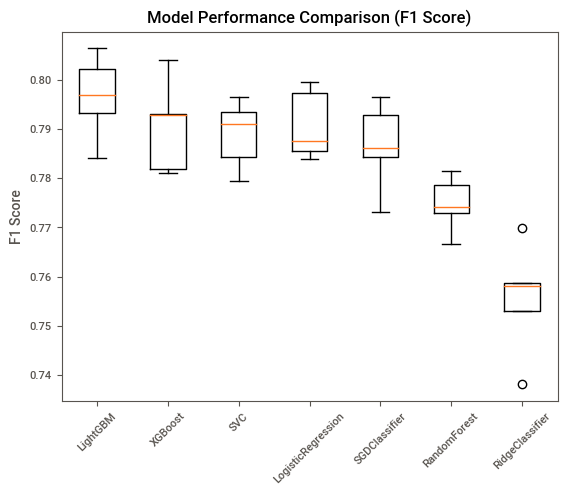

In [15]:
# Models to train
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVC': SVC(random_state=42),
    'SGDClassifier': SGDClassifier(max_iter=1000, random_state=42),
    'RidgeClassifier': RidgeClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Stratified K-Fold for balanced sampling
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Training models and evaluating performance
scores = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring=make_scorer(f1_score))
    scores[name] = cv_scores
    print(f"{name}: {cv_scores.mean()} ± {cv_scores.std()}")

# Ordering models by median F1 score
sorted_scores = {k: v for k, v in sorted(scores.items(), key=lambda item: -np.median(item[1]))}

# Plotting model performances
plt.boxplot(sorted_scores.values(), labels=sorted_scores.keys())
plt.xticks(rotation=45)
plt.title('Model Performance Comparison (F1 Score)')
plt.ylabel('F1 Score')
plt.show()

model to ensemble:

* LightGBM 
* XGBoost
* SVC

# <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Train model</div>

In [16]:
# Initialize models
lgbm = LGBMClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)

# Fine-tuning models using Random search

# LightGBM parameter grid
lgbm_param_grid = {
    'lgbm__n_estimators': [100, 200, 300, 400, 500, 1000],
    'lgbm__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
    'lgbm__max_depth': [3, 5, 7, 10, 12, 15],
    'lgbm__num_leaves': [31, 50],
}

# Fine-tuning XGBoost
# XGBoost parameter grid
xgb_param_grid = {
    'xgb__n_estimators': [100, 200, 300, 400, 500, 1000],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
    'xgb__max_depth': [3, 5, 7, 10],
    'xgb__subsample': [0.6, 0.8, 1.0],
}

# SVC parameter grid
svc_param_grid = {
    'svc__C': [1, 10, 100],  # critical parameter
    'svc__kernel': ['linear', 'rbf'],  # important parameter
    # Removed gamma and other less critical parameters for simplicity
}

svc_param_grid = {
    'svc__C': [0.1, 1, 10, 100, 1000],
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svc__gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
}

In [17]:
num_combinations = len(list(product(*lgbm_param_grid.values())))
num_combinations
print("lgbm parameters combinations:", num_combinations)

lgbm parameters combinations: 504


In [18]:
num_combinations = len(list(product(*xgb_param_grid.values())))
num_combinations
print("xgb parameters combinations:", num_combinations)

xgb parameters combinations: 504


In [19]:
# Calculate the number of combinations
num_combinations = len(list(product(*svc_param_grid.values())))
num_combinations
print("svc parameters combinations:", num_combinations)

svc parameters combinations: 100


In [20]:
n_iter_lgbm = 160
n_iter_xgb = 300
n_iter_svc = 100

In [21]:
# Pipelines for each model with RandomizedSearchCV

pipeline_lgbm = Pipeline(steps=[('preprocessor', preprocessor), ('lgbm', lgbm)])
random_search_lgbm = RandomizedSearchCV(pipeline_lgbm, lgbm_param_grid, n_iter=n_iter_lgbm, cv=skf, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_lgbm.fit(X_train, y_train)
best_lgbm_pipeline = random_search_lgbm.best_estimator_

# XGBoost Pipeline
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor), ('xgb', xgb)])
random_search_xgb = RandomizedSearchCV(pipeline_xgb, xgb_param_grid, n_iter=n_iter_xgb, cv=skf, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train, y_train)
best_xgb_pipeline = random_search_xgb.best_estimator_

# SVC Pipeline
pipeline_svc = Pipeline(steps=[('preprocessor', preprocessor), ('svc', svc)])
random_search_svc = RandomizedSearchCV(pipeline_svc, svc_param_grid, n_iter=n_iter_svc, cv=skf, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_svc.fit(X_train, y_train)
best_svc_pipeline = random_search_svc.best_estimator_

# Voting Classifier using the best pipelines
voting_clf = VotingClassifier(estimators=[
    ('lgbm', best_lgbm_pipeline), 
    ('xgb', best_xgb_pipeline), 
    ('svc', best_svc_pipeline)],
    voting='soft')

# No need for additional preprocessor in the final pipeline
pipeline = Pipeline(steps=[('classifier', voting_clf)])

In [22]:
# Training and evaluating the ensemble model
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='accuracy')
print(f"Ensemble Model Accuracy: {cross_val_scores.mean()} ± {cross_val_scores.std()}")

# Fit the model on the entire training data and evaluate on the test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Calculating Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Ensemble Model Accuracy: 0.8007670182166826 ± 0.009043011407517985
Accuracy: 0.7872340425531915
Precision: 0.7592592592592593
Recall: 0.8443935926773455
F1 Score: 0.7995666305525461


# <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Prepare final submission</div>

In [23]:
# Step 1: Train the model on the full training dataset
pipeline.fit(X_train, y_train)

# Step 2: Predictions on the test dataset
# Ensure the test data is processed similarly to how train data was processed
y_test_pred = pipeline.predict(test_data)

# Step 3: Create the submission file
# Assuming 'PassengerId' is the identifier in your test dataset
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Transported': y_test_pred
})

# Ensure 'Transported' column contains boolean values (False or True)
submission['Transported'] = submission['Transported'].astype(bool)

# Save the submission file
submission.to_csv('submission.csv', index=False)